In [1]:
from apps.onedimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.onedimensional.shallowwaterlinearizedmomentequations.manufacturedsolutionexample import manufactured_solution_example as swlme_mse
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Manufactured Solution

In [16]:
gravity_constant = 1.0
num_moments = 0

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments,
    gravity_constant,
)

time_final = 0.2
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 2
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 5
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 20
x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.3
delta_x = (x_right - x_left) / num_elems
delta_t = float(dg_utils.get_delta_t_1d(cfl, problem.max_wavespeed, delta_x))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [17]:
final_solution = main.run(problem)

20.0%
Will finish in 0:00:00.909212 at 13:54:33.981156
40.0%
Will finish in 0:00:00.685365 at 13:54:33.986916
60.0%
Will finish in 0:00:00.461019 at 13:54:33.997188
80.0%
Will finish in 0:00:00.231859 at 13:54:34.003938
100.0%
Will finish in 0:00:00 at 13:54:33.997012


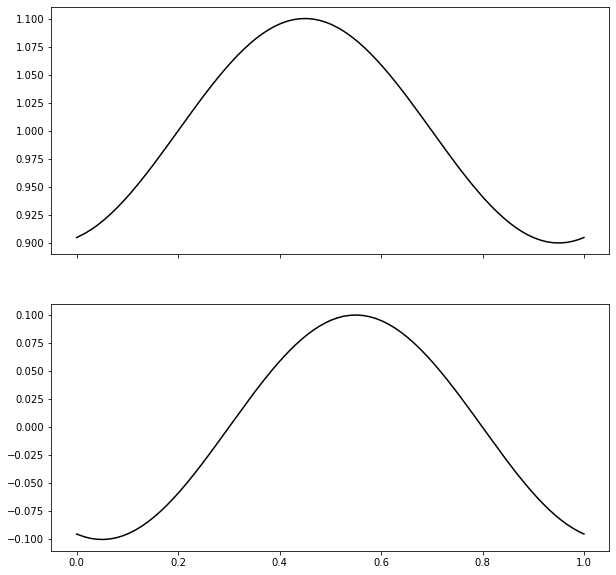

In [14]:
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
fig = plot.create_plot_dg_1d(final_solution)
#lines = plot.plot_function(fig.axes, exact_final_solution, x_left, x_right, style='b')

#ani, fig = plot.create_animation_output_dir(problem.output_dir, problem.exact_solution)
#HTML(ani.to_html5_video())

In [18]:
error = math_utils.compute_error(final_solution, exact_final_solution)
error

0.005827211021240443

## Convergence Test

In [4]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments,
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.2
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["num_frames"] = 1

x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl_dict = {1: 0.9, 2:0.3, 3:0.2, 4:0.1}

In [8]:
for space_time_order in range(1, 5):
    problem.parameters["basis"]["space_order"] = space_time_order
    problem.parameters["time_stepping"]["order"] = space_time_order
    cfl = cfl_dict[space_time_order]
    error_list = []
    for n in [20, 40]:
        problem.output_dir = "output_" + str(n)
        problem.parameters["mesh"]["num_elems"] = n
        delta_x = (x_right - x_left) / n
        delta_t = float(dg_utils.get_delta_t_1d(cfl, problem.max_wavespeed, delta_x))
        problem.parameters["delta_t"] = delta_t
        
        problem._setup_objects()
        
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(error_list)
    print(order)
#     if error_list[-1] >= math_utils.MACHINE_ERROR:
#         assert rount(order) >= num_basis_cpts

[0.1133231941753061, 0.056810867602301376]
0.9962043310499433
[0.2363443213362455, 0.12416467744267887]
0.9286353895305353
[0.23615031396843325, 0.12415788800449969]
0.9275295318006758
[0.23614008160384486, 0.12415643899768126]
0.9274838559729399
